Import the required packages

In [254]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sklearn.decomposition
from sklearn import tree
from sklearn.datasets import fetch_mldata

Load our bagging function

In [255]:
class bagging():
    """
    Parameters
    ----------
    clf : the classification or regression function you wish to run you bagging algorithm on

    bootstraps : the number of bootstrap samples to run

    aggmethod : the method of aggregating the results.
        either voting or average.

    oob : if true estimates and returns the Out Of Bag Error Rate(oober)
            Left as an exercise for the reader

    Attributes
    ----------
    bootstraps : a dictionary of the fitted models for the bootstrap samples

    oober : the Out Of Bag Error Rate
    """
    def __init__(self,clf,bootstraps,aggmethod="voting",oober=False):
        self.clf = clf
        self.n = bootstraps
        self.method = aggmethod
        self.oob = oober
        self.bootstraps = {}

    def fit(self,X,y):
        self.start_time = time.time()
        self.elapsed_time = -20
        for i in np.arange(self.n):
            clf1 = sklearn.base.clone(self.clf)
            index = np.random.randint(0, X.shape[0], size=X.shape[0])
            self.bootstraps[i] = clf1.fit(X[index, 0:],y[index])
            if self.oob:
                np.in1d(np.arange(X.shape[0]),index)
            self.timit(i)
        self.labels = np.unique(y)

    def predict(self,X):
            if self.method =="voting":
                pred = np.zeros((X.shape[0],self.labels.shape[0]))
                for i in np.arange(self.n):
                    pred += np.tile(self.bootstraps[i].predict(X).reshape(-1,1),(1,self.labels.shape[0])) ==\
                           np.tile(self.labels, (X.shape[0], 1))
                pred = self.labels[np.argmax(pred,axis = 1)]
            elif self.method == "average":
                pred = np.zeros(X.shape[0])
                for i in np.arange(self.n):
                    pred += self.bootstraps[i].predict(X)/self.n
            else:
                print("Select a valid aggregation method")
            return pred

    def timit(self,i):
        if time.time() - self.elapsed_time - self.start_time > 30:
            self.elapsed_time = (time.time() - self.start_time)
            avg = (self.elapsed_time / i) * (self.n - i)
            print("This has taken ",
                  np.round(self.elapsed_time, 1),
                  "seconds and is expected to take ",
                  np.round(avg, 1),
                  "seconds more ")

Load the MNIST dataset

In [256]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Collect data and labels and divide the data into training and test

In [257]:
index = np.random.permutation(np.arange(mnist.data.shape[0]))
train = mnist.data[index[0:10000]]
train_labels = mnist.target[index[0:10000]]
test = mnist.data[index[10000:]]
test_labels = mnist.target[index[10000:]]

Fit a normal CART tree with a max depth of 100

In [258]:
blob_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100)
blob_tree.fit(train,train_labels)
np.sum(blob_tree.predict(test) == test_labels)/test.shape[0]

0.81801666666666661

Use the same tree but 5 bags

In [259]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100)
bag = bagging(clf,5)
bag.fit(train,train_labels)
np.sum(bag.predict(test) == test_labels)/test.shape[0]

This has taken  11.3 seconds and is expected to take  2.8 seconds more 


0.88783333333333336

20 bags

In [260]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100)
bag = bagging(clf,20)
bag.fit(train,train_labels)
np.sum(bag.predict(test) == test_labels)/test.shape[0]

This has taken  12.2 seconds and is expected to take  48.7 seconds more 
This has taken  42.8 seconds and is expected to take  10.7 seconds more 


0.92149999999999999

50 bags

In [265]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100)
bag = bagging(clf,50)
bag.fit(train,train_labels)
np.sum(bag.predict(test) == test_labels)/test.shape[0]

This has taken  12.4 seconds and is expected to take  142.9 seconds more 
This has taken  43.4 seconds and is expected to take  84.2 seconds more 
This has taken  74.0 seconds and is expected to take  49.4 seconds more 
This has taken  104.7 seconds and is expected to take  17.0 seconds more 


0.92949999999999999

75 bags

In [263]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100)
bag = bagging(clf,75)
bag.fit(train,train_labels)
np.sum(bag.predict(test) == test_labels)/test.shape[0]

This has taken  10.3 seconds and is expected to take  246.5 seconds more 
This has taken  40.5 seconds and is expected to take  162.1 seconds more 
This has taken  70.8 seconds and is expected to take  118.8 seconds more 
This has taken  101.3 seconds and is expected to take  84.0 seconds more 
This has taken  131.5 seconds and is expected to take  51.1 seconds more 
This has taken  161.6 seconds and is expected to take  19.3 seconds more 


0.92679999999999996

100 bags

In [262]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=100)
bag = bagging(clf,100)
bag.fit(train,train_labels)
np.sum(bag.predict(test) == test_labels)/test.shape[0]

This has taken  11.3 seconds and is expected to take  365.0 seconds more 
This has taken  42.2 seconds and is expected to take  259.0 seconds more 
This has taken  74.0 seconds and is expected to take  210.7 seconds more 
This has taken  105.5 seconds and is expected to take  172.2 seconds more 
This has taken  137.2 seconds and is expected to take  126.6 seconds more 
This has taken  168.5 seconds and is expected to take  90.7 seconds more 
This has taken  199.3 seconds and is expected to take  56.2 seconds more 
This has taken  231.4 seconds and is expected to take  22.9 seconds more 


0.93176666666666663

Visualization of decision boundries

In [112]:
index = ((train_labels ==0) + (train_labels ==5)+(train_labels ==9))
x = train[index]
y = train_labels[index]
index = ((test_labels ==0) + (test_labels ==5)+(test_labels ==9))
x_test = test[index]
y_test = test_labels[index]
m = sklearn.decomposition.PCA(2)
x = m.fit_transform(x)
x_test = m.transform(x_test)

In [213]:
blob_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=30)
blob_tree.fit(x,y)
np.sum(blob_tree.predict(x_test) == y_test)/x_test.shape[0]

0.77798377752027814

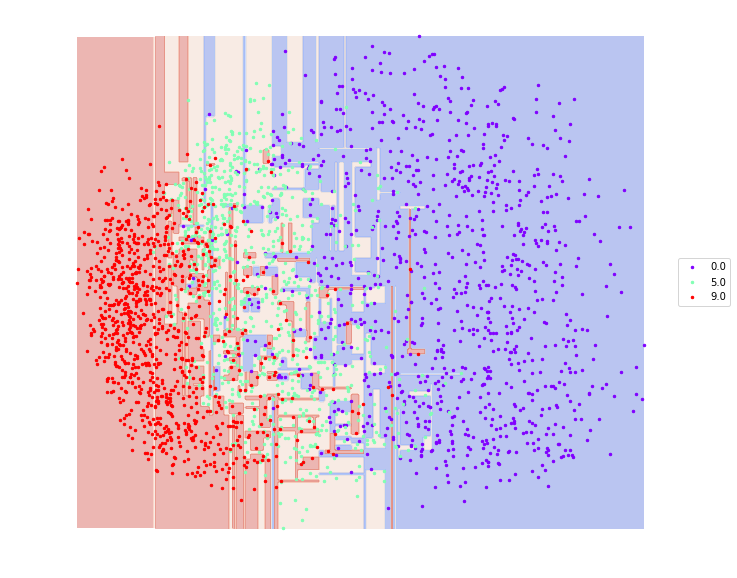

In [248]:
%matplotlib inline
m = np.arange(np.unique(y).size)
color = plt.cm.rainbow(m / (np.unique(m).size-1))

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),
                     np.arange(y_min, y_max, 10))
Z = blob_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axarr =plt.subplots(1,1,figsize=(14,10))
axarr.contourf(xx, yy, Z, alpha=0.4,cmap=plt.get_cmap('coolwarm'))
marker = ['o','v','.','^']
count = 0
for i in np.unique(y):
    axarr.scatter(x[y ==i,0],
                x[y ==i,1],
                c = color[count],s=6,alpha=1,label=i)
    count+=1
axarr.axis('off')
box = axarr.get_position()
axarr.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axarr.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [214]:
clf = tree.DecisionTreeClassifier(criterion="entropy",max_depth=10)
bag = bagging(clf,50)
bag.fit(x,y)
np.sum(bag.predict(x_test) == y_test)/x_test.shape[0]

0.83180764774044036

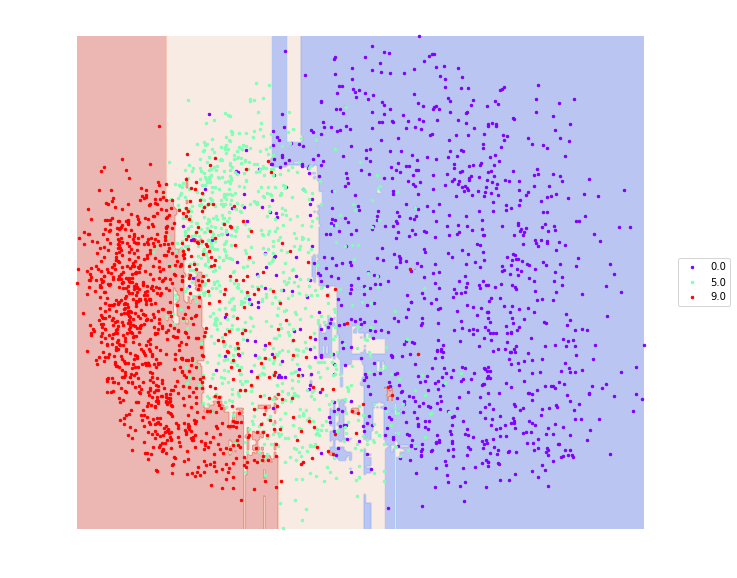

In [249]:
Z = bag.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axarr =plt.subplots(1,1,figsize=(14,10))
axarr.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.coolwarm)
marker = ['o','v','.','^']
count = 0
for i in np.unique(y):
    axarr.scatter(x[y ==i,0],
                x[y ==i,1],
                c = color[count],s=6,alpha=1,label = i)
    count+=1
axarr.axis('off')
box = axarr.get_position()
axarr.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axarr.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [252]:
import sklearn.ensemble
j = sklearn.ensemble.GradientBoostingClassifier()
j.fit(x,y)
np.sum(m.predict(x_test) == y_test)/x_test.shape[0]

0.83209733487833137

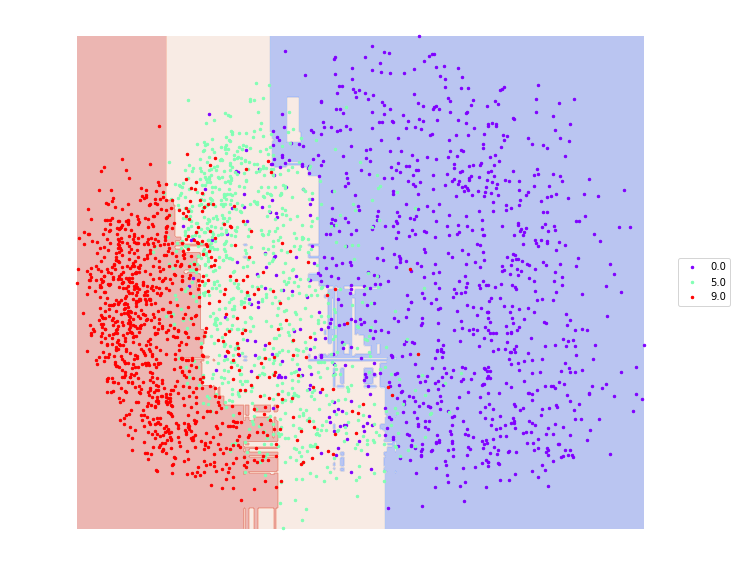

In [253]:
Z = j.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
fig, axarr =plt.subplots(1,1,figsize=(14,10))
axarr.contourf(xx, yy, Z, alpha=0.4,cmap=plt.cm.coolwarm)
marker = ['o','v','.','^']
count = 0
for i in np.unique(y):
    axarr.scatter(x[y ==i,0],
                x[y ==i,1],
                c = color[count],s=6,label = i)
    count+=1
axarr.axis('off')
box = axarr.get_position()
axarr.set_position([box.x0, box.y0, box.width * 0.8, box.height])
axarr.legend(loc='center left', bbox_to_anchor=(1, 0.5))